# Laterality Models using Stat Features
# REPLACE DESCRIPTION!
This notebook covers all the process of definition preprocessing, training and evaluation for 3 asa inference models. The proposed models are: SVM, KNN and Gradient Boost classifier.

All the models aim to classify if a person appears to have asymmetry (1) or not (0) during a 6 meters walk.

This model will use statistical descriptive data from the walk as features for model training.

## Requiered Imports

In [1]:
import os
import pickle


from src.settings import ROOT_DIR
from src.model.standard_models_builder import build_models_modules
from src.evaluation.model_metrics_report import print_sklearn_model_metrics

## Load Data

In [2]:
train_data_path = ROOT_DIR / 'data' / 'processed' / 'asa-features' / 'train.pkl'
val_data_path = ROOT_DIR / 'data' / 'processed' / 'asa-features' / 'val.pkl'

with open(train_data_path, 'rb') as file:
    train_data = pickle.load(file)

with open(val_data_path, 'rb') as file:
    val_data = pickle.load(file)

In [3]:
len(train_data)

14809

In [4]:
features = train_data.columns.tolist()
target = features.pop(-1)

X_train, y_train = train_data[features], train_data[target]
X_val, y_val = val_data[features], val_data[target]

## Models
Define and train the models using GridSearch

In [9]:
svm, knn, gboost = build_models_modules(X_train, y_train)

Started Grid Search - Model: SVM
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters SVM: {'C': 1000, 'kernel': 'rbf'}
Finished Grid Search - Model: SVM
Started Grid Search - Model: KNN
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters KNN: {'n_neighbors': 7, 'weights': 'distance'}
Finished Grid Search - Model: KNN
Started Grid Search - Model: Gradient Boosting Classifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters Gradient Boosting Classifier: {'learning_rate': 0.1, 'n_estimators': 64, 'n_iter_no_change': 20}
Finished Grid Search - Model: Gradient Boosting Classifier


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

svm = SVC(probability=True, kernel='rbf', C=1000)
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(X_train, y_train)

gboost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=64, n_iter_no_change=20)
gboost.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=64, n_iter_no_change=20)

## Train Metrics

Accuracy: 0.8253764602606523
0.6487814382926247
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      8005
           1       0.81      0.82      0.81      6804

    accuracy                           0.83     14809
   macro avg       0.82      0.82      0.82     14809
weighted avg       0.83      0.83      0.83     14809

AUC-ROC: 0.8247054493792644
AUC-PR: 0.8533895395797682


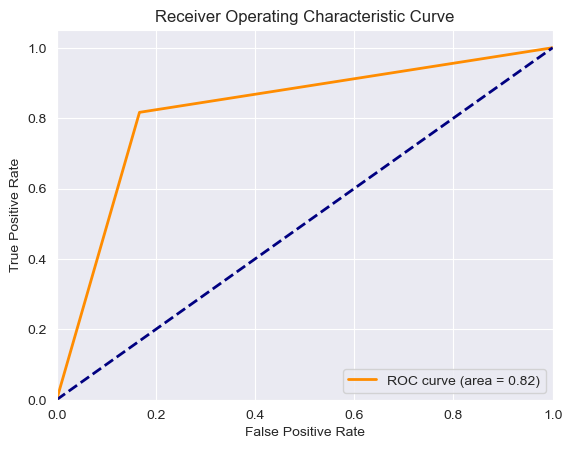

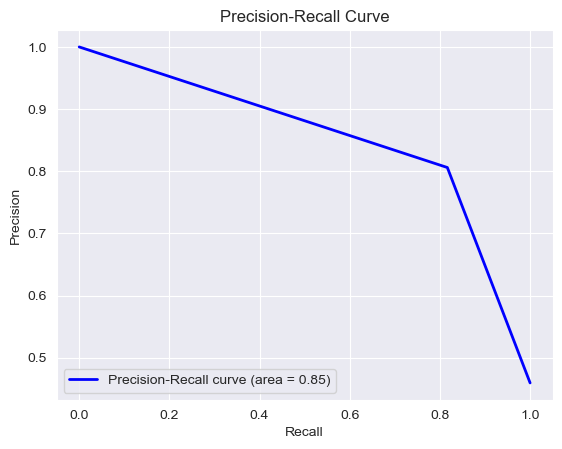

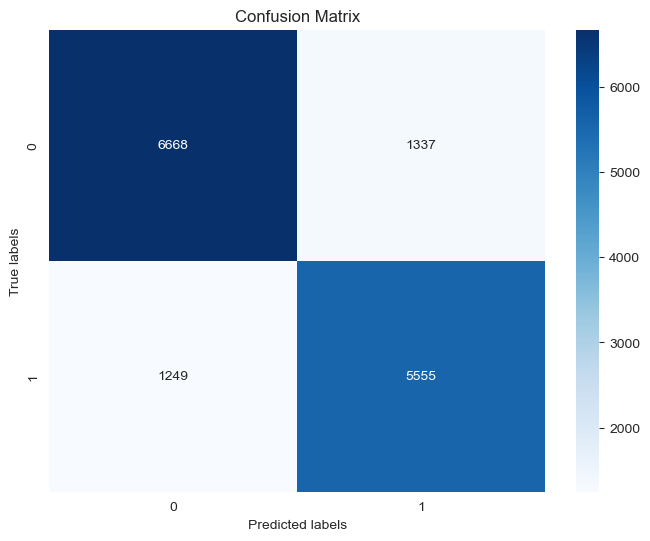

In [6]:
print_sklearn_model_metrics(svm, X_train, y_train.to_numpy())

Accuracy: 1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8005
           1       1.00      1.00      1.00      6804

    accuracy                           1.00     14809
   macro avg       1.00      1.00      1.00     14809
weighted avg       1.00      1.00      1.00     14809

AUC-ROC: 1.0
AUC-PR: 1.0


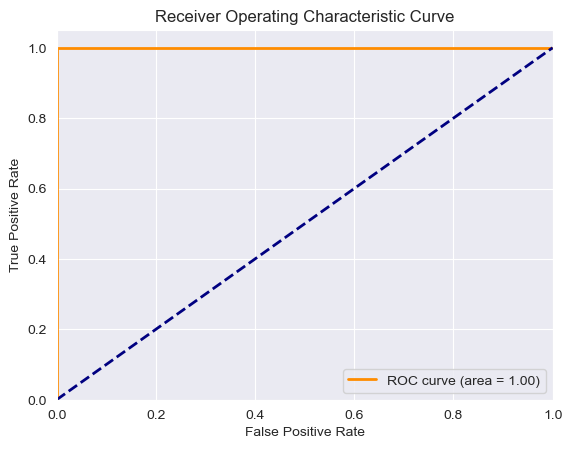

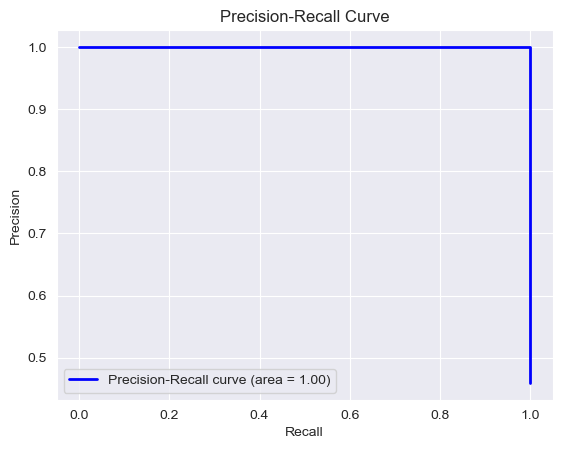

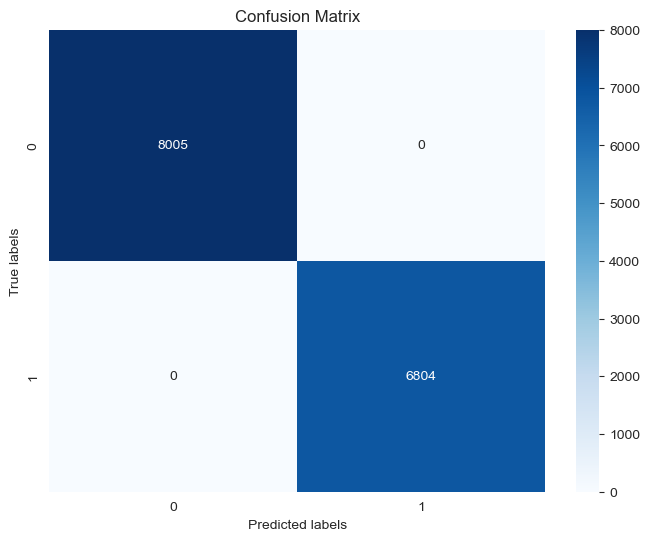

In [7]:
print_sklearn_model_metrics(knn, X_train, y_train.to_numpy())

Accuracy: 0.8455668850023634
0.6886529267694
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      8005
           1       0.84      0.82      0.83      6804

    accuracy                           0.85     14809
   macro avg       0.84      0.84      0.84     14809
weighted avg       0.85      0.85      0.85     14809

AUC-ROC: 0.8438443363403458
AUC-PR: 0.8711797761459943


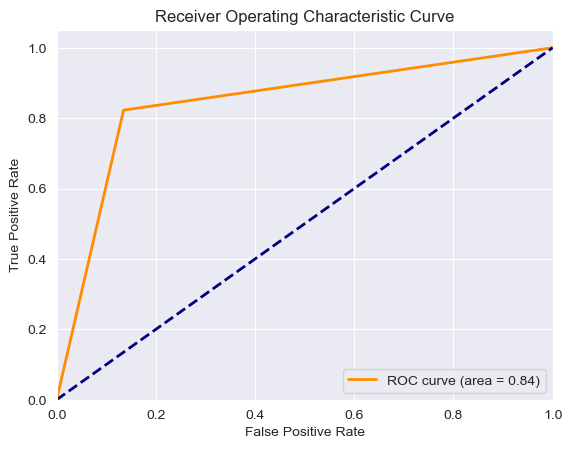

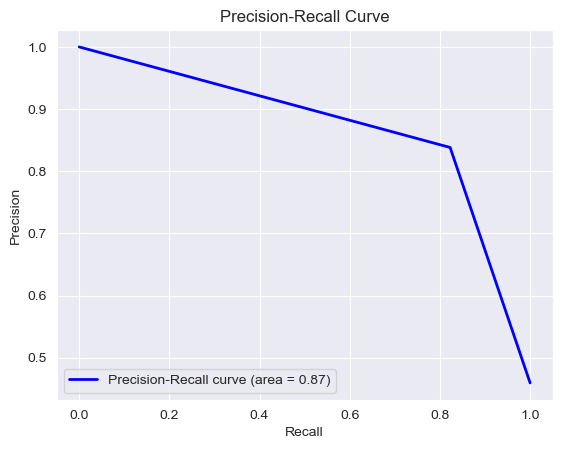

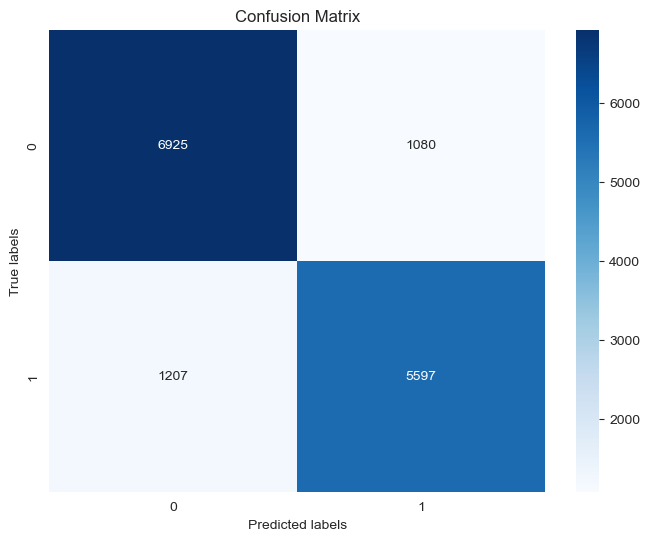

In [8]:
print_sklearn_model_metrics(gboost, X_train, y_train)

## Val Metrics

Accuracy: 0.8038487508440243
0.604814727553217
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1606
           1       0.79      0.78      0.79      1356

    accuracy                           0.80      2962
   macro avg       0.80      0.80      0.80      2962
weighted avg       0.80      0.80      0.80      2962

AUC-ROC: 0.802355290081075
AUC-PR: 0.8348216987015099


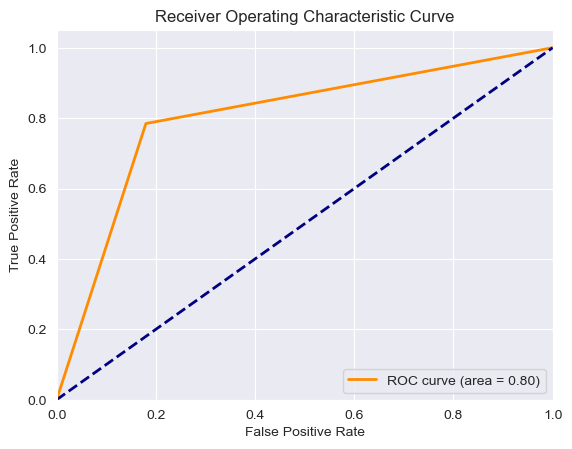

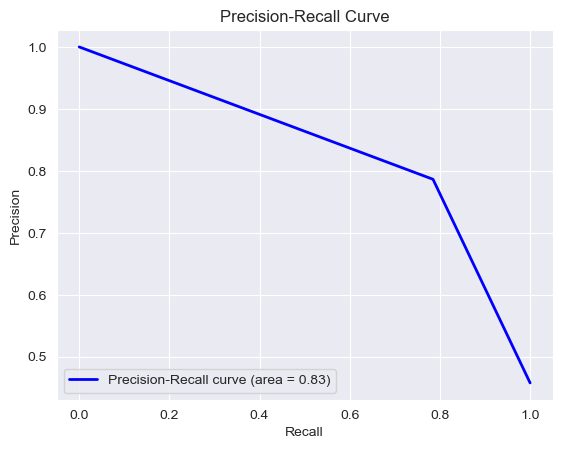

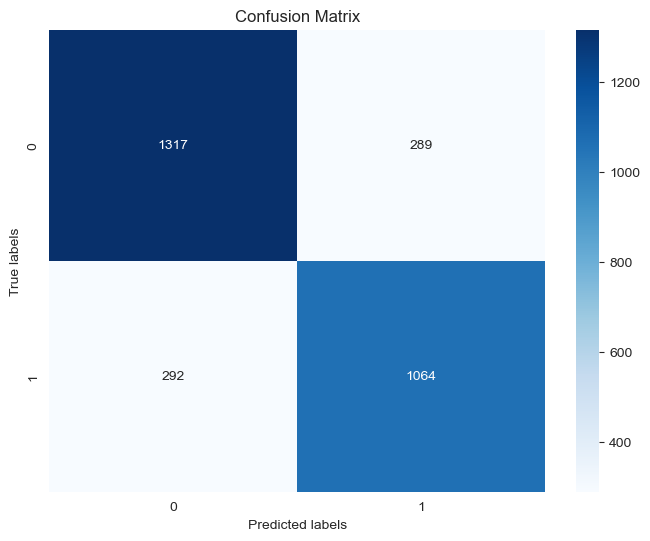

In [15]:
print_sklearn_model_metrics(svm, X_val, y_val)

Accuracy: 0.8305199189736664
0.6586078385993528
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1606
           1       0.81      0.81      0.81      1356

    accuracy                           0.83      2962
   macro avg       0.83      0.83      0.83      2962
weighted avg       0.83      0.83      0.83      2962

AUC-ROC: 0.8293039192996764
AUC-PR: 0.8572667754188252


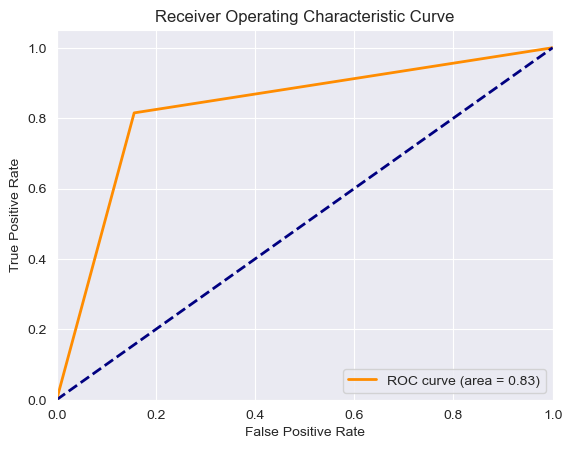

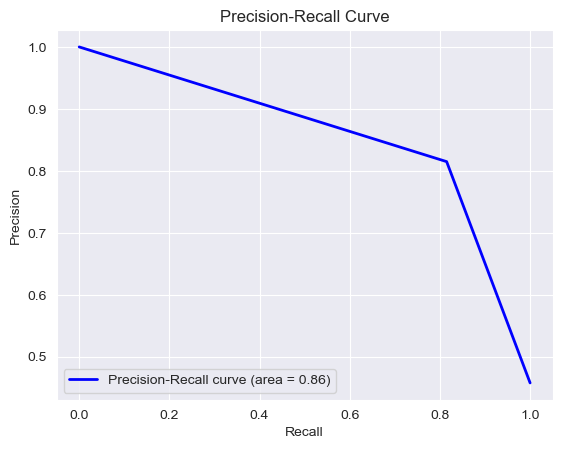

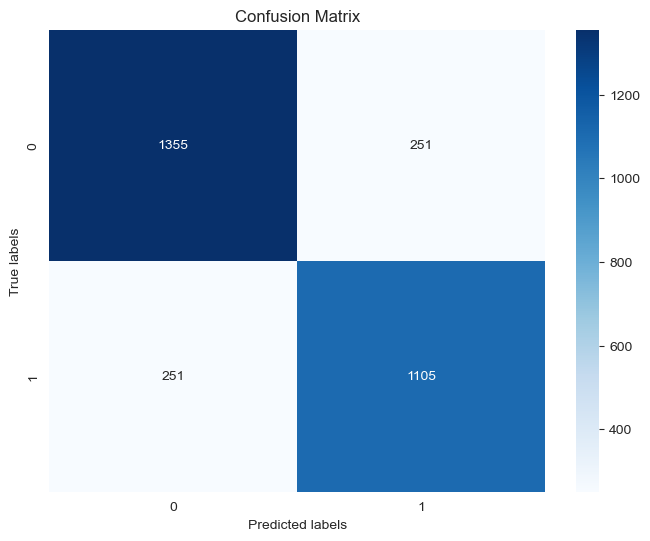

In [16]:
print_sklearn_model_metrics(knn, X_val, y_val)

Accuracy: 0.824780553679946
0.6456841438561862
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1606
           1       0.82      0.78      0.80      1356

    accuracy                           0.82      2962
   macro avg       0.82      0.82      0.82      2962
weighted avg       0.82      0.82      0.82      2962

AUC-ROC: 0.8216005062137925
AUC-PR: 0.8537566198824582


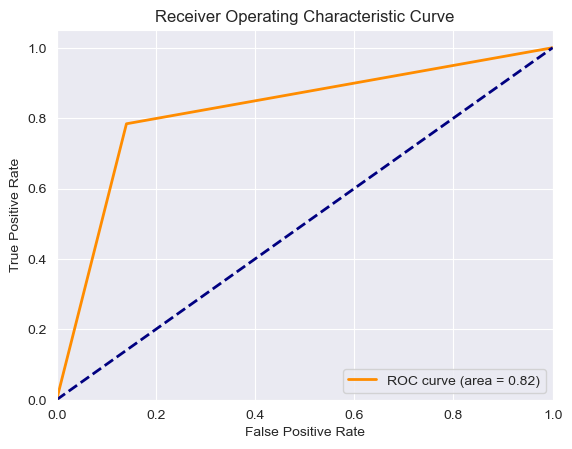

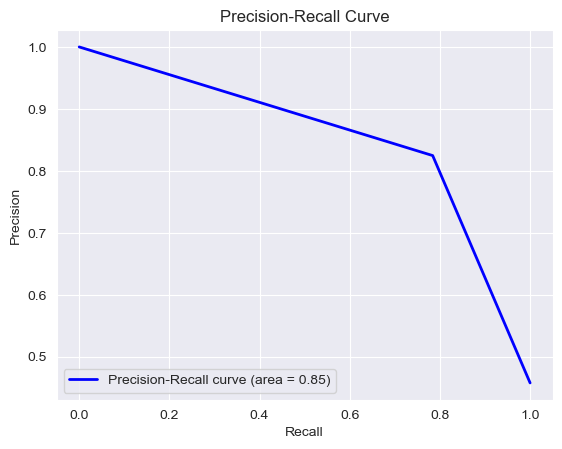

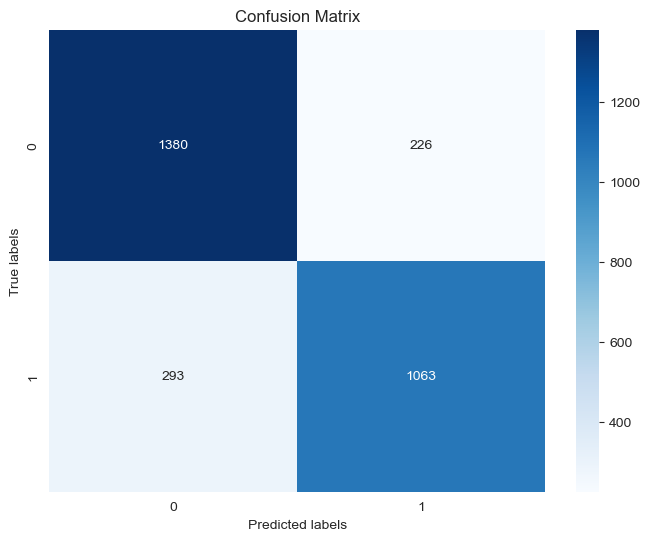

In [17]:
print_sklearn_model_metrics(gboost, X_val, y_val)

## Save models

In [9]:
save_path = str(ROOT_DIR) + '/results/models/asa-features/'

os.makedirs(save_path, exist_ok=True)

with open(save_path + 'model.svm.pkl', 'wb') as file:
    pickle.dump(svm, file)
    file.close()
    
with open(save_path + 'model.knn.pkl', 'wb') as file:
    pickle.dump(knn, file)
    file.close()
    
with open(save_path + 'model.gboost.pkl', 'wb') as file:
    pickle.dump(gboost, file)
    file.close()
    